# Deep Learning & Computer vision
 # Variational Auto Encoder Exercise



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the architecture parameters
latent_dimension = 10

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64 * 7 * 7, latent_dimension)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.flatten(x)
        x = self.fc(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(latent_dimension, 64 * 7 * 7)
        self.conv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 64, 7, 7)
        x = torch.relu(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        return x

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        latent_code = self.encoder(x)
        reconstructed_x = self.decoder(latent_code)
        return reconstructed_x, latent_code

# Load MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Instantiate the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, _ = data
        optimizer.zero_grad()
        outputs, _ = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print('Finished Training')


100%|██████████| 9912422/9912422 [00:00<00:00, 72942403.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 16175149.40it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42553832.41it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12451325.99it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 0.04563329287413468
Epoch 2, Loss: 0.02306229966694612
Epoch 3, Loss: 0.019826385933262452
Epoch 4, Loss: 0.0182437761438522
Epoch 5, Loss: 0.01727222373236471
Epoch 6, Loss: 0.016546566871358262
Epoch 7, Loss: 0.016012519165110994
Epoch 8, Loss: 0.01558808416827147
Epoch 9, Loss: 0.015238792220476086
Epoch 10, Loss: 0.014924565971549005
Finished Training


In [2]:

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)


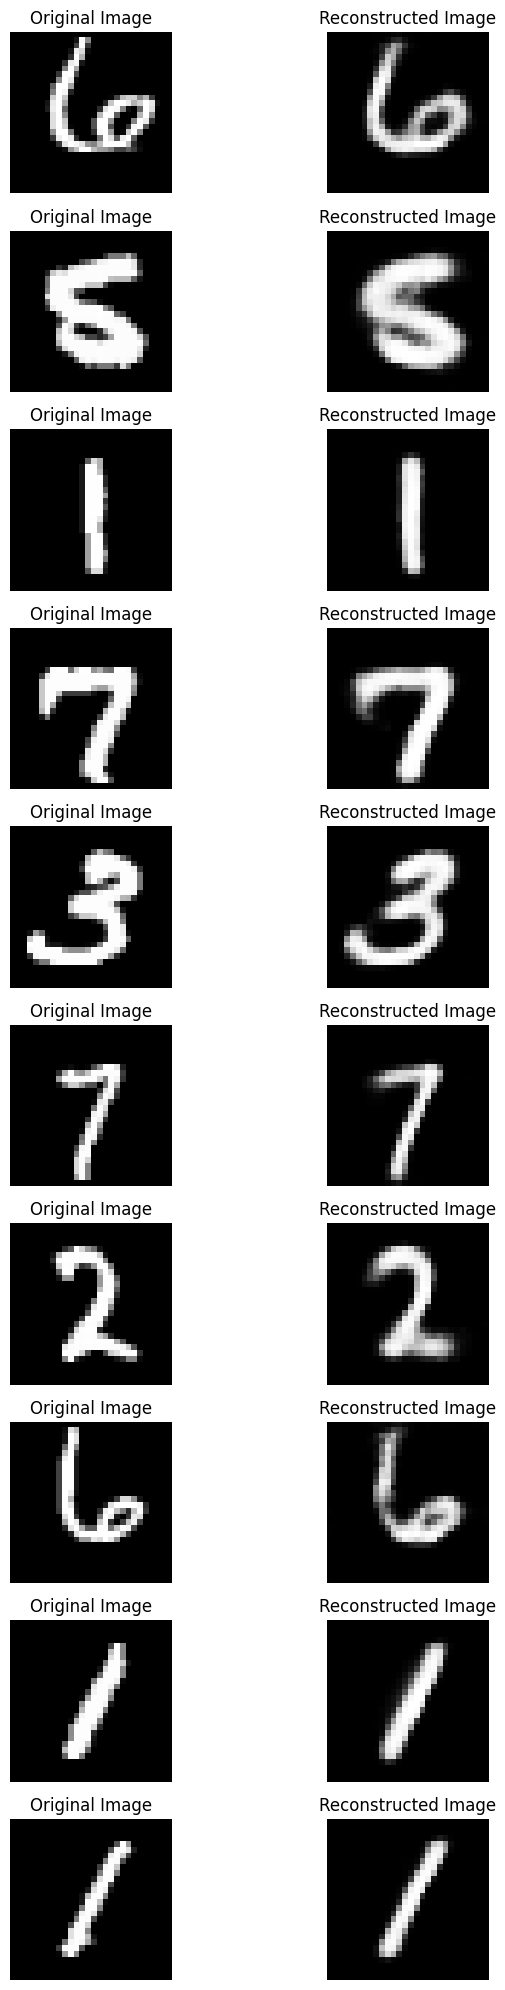

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# plot original and reconstructed images
def plot_images(original_images, reconstructed_images):
    num_images = original_images.shape[0]
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 2*num_images))
    for i in range(num_images):
        axes[i, 0].imshow(original_images[i].squeeze(), cmap='gray')
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(reconstructed_images[i].squeeze(), cmap='gray')
        axes[i, 1].set_title('Reconstructed Image')
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the test dataset
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
images, _ = next(iter(test_loader))

# Use the trained model to reconstruct the images
with torch.no_grad():
    reconstructed_images, _ = model(images)

# Convert images to numpy arrays for plotting
original_images_np = images.numpy()
reconstructed_images_np = reconstructed_images.numpy()


plot_images(original_images_np, reconstructed_images_np)


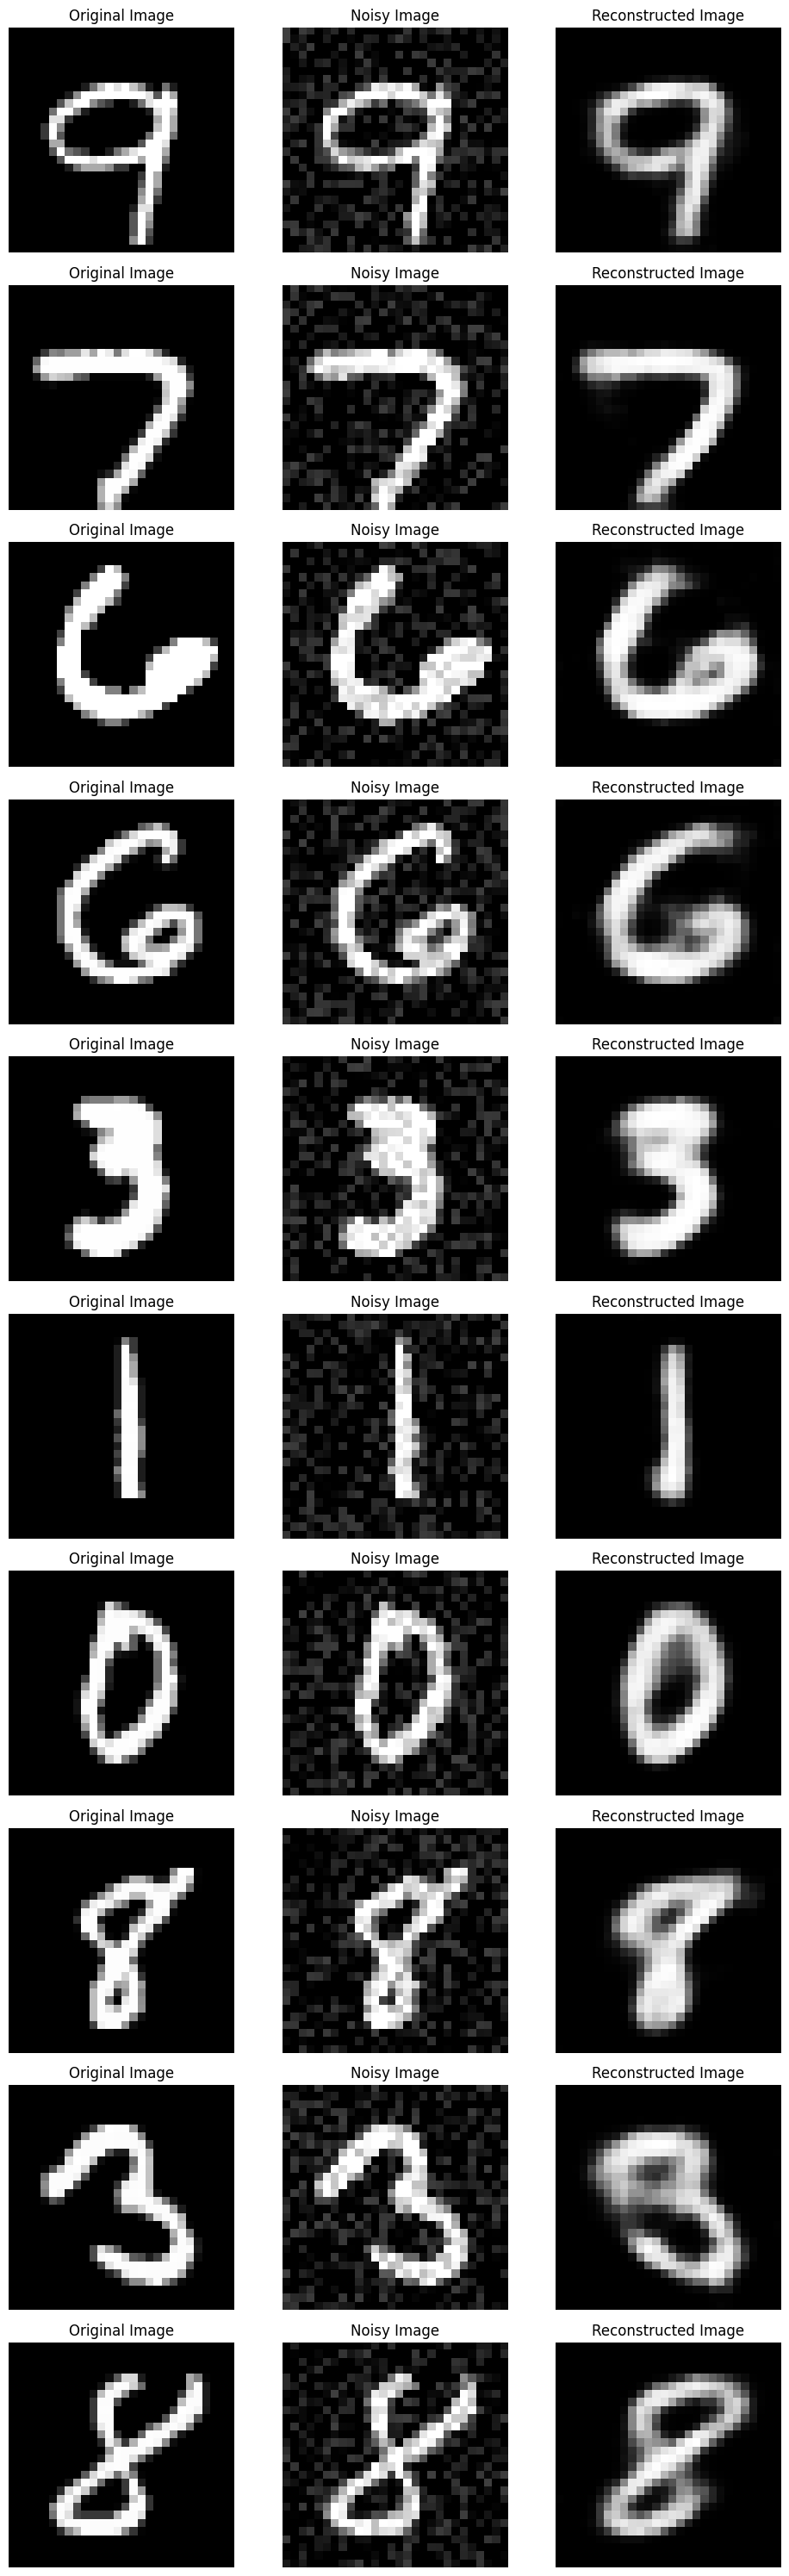

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to add noise to images
def add_noise(images):
    noise = torch.rand_like(images) - 0.5
    noisy_images = torch.clamp(images + 0.5 * noise, 0, 1)
    return noisy_images

# Get a batch of images from the test dataset
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
images, _ = next(iter(test_loader))

# Add noise to the images
noisy_images = add_noise(images)

# Use the trained model to reconstruct the noisy images
with torch.no_grad():
    reconstructed_images, _ = model(noisy_images)

# Convert images to numpy arrays for plotting
original_images_np = images.numpy()
noisy_images_np = noisy_images.numpy()
reconstructed_images_np = reconstructed_images.numpy()

# Plot original, noisy, and reconstructed images
num_images = original_images_np.shape[0]
fig, axes = plt.subplots(num_images, 3, figsize=(10, 3*num_images))
for i in range(num_images):
    axes[i, 0].imshow(original_images_np[i].squeeze(), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(noisy_images_np[i].squeeze(), cmap='gray')
    axes[i, 1].set_title('Noisy Image')
    axes[i, 1].axis('off')
    axes[i, 2].imshow(reconstructed_images_np[i].squeeze(), cmap='gray')
    axes[i, 2].set_title('Reconstructed Image')
    axes[i, 2].axis('off')
plt.tight_layout()
plt.show()


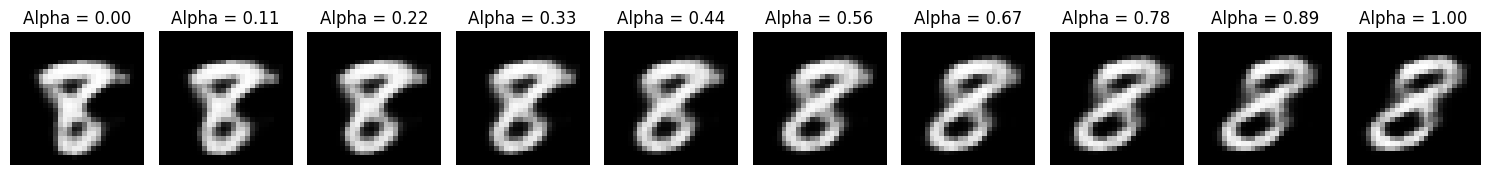

In [5]:
# Select two images from different classes
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True)
images, labels = next(iter(test_loader))

# Encode the images to obtain their latent codes
with torch.no_grad():
    z1 = model.encoder(images[0].unsqueeze(0))
    z2 = model.encoder(images[1].unsqueeze(0))

# Interpolate between the latent codes
alpha_values = np.linspace(0, 1, num=10)
interpolated_images = []
with torch.no_grad():
    for alpha in alpha_values:
        z = (1 - alpha) * z1 + alpha * z2
        fake_image = model.decoder(z)
        interpolated_images.append(fake_image)

# Plot the interpolated images
fig, axes = plt.subplots(1, len(interpolated_images), figsize=(15, 3))
for i, fake_image in enumerate(interpolated_images):
    axes[i].imshow(fake_image.squeeze().numpy(), cmap='gray')
    axes[i].set_title(f'Alpha = {alpha_values[i]:.2f}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()


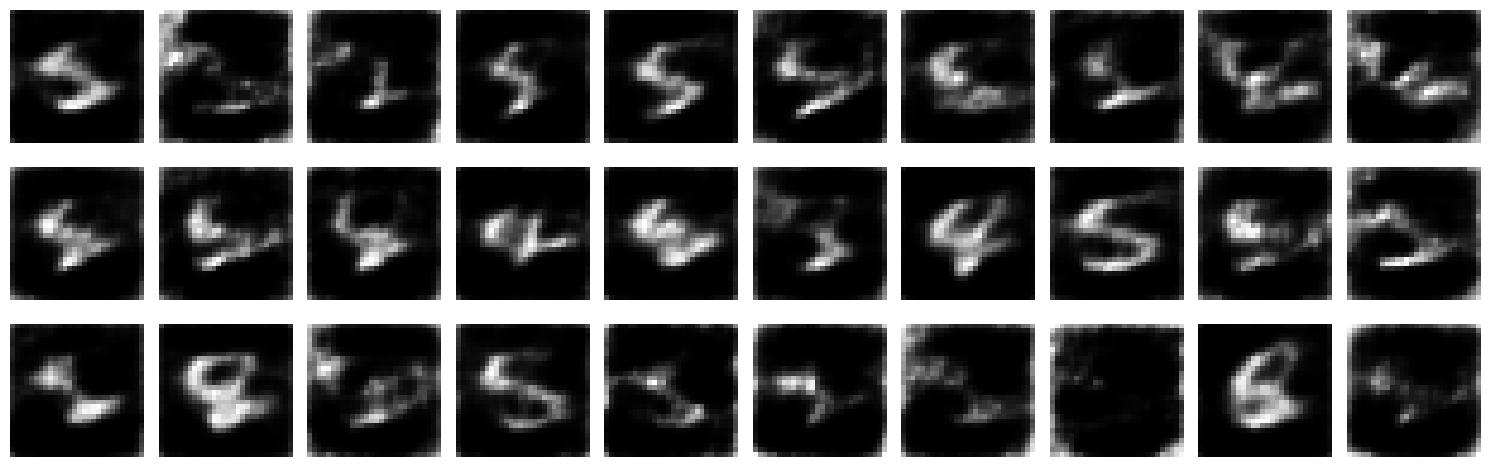

In [6]:
# Generate random samples from the latent space
latent_samples = torch.randn(30, latent_dimension)

# Decode the latent samples to obtain fake images
with torch.no_grad():
    fake_images = model.decoder(latent_samples)

# Plot the fake images
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
for i in range(30):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(fake_images[i].squeeze().numpy(), cmap='gray')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()


#**Variational** **Auto** **Encoder** **bold text**

In [7]:
import torch.nn.functional as F

class VEncoder(nn.Module):
    def __init__(self):
        super(VEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.flatten = nn.Flatten()
        self.fc_mu = nn.Linear(64 * 7 * 7, latent_dimension)
        self.fc_logvar = nn.Linear(64 * 7 * 7, latent_dimension)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class VDecoder(nn.Module):
    def __init__(self):
        super(VDecoder, self).__init__()
        self.fc = nn.Linear(latent_dimension, 64 * 7 * 7)
        self.conv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 64, 7, 7)
        x = F.relu(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        return x

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = VEncoder()
        self.decoder = VDecoder()

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decoder(z)
        return recon_x, mu, logvar

# Instantiate the VAE model
vae_model = VAE()


In [8]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = VEncoder()
        self.decoder = VDecoder()

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decoder(z)
        return recon_x, mu, logvar

# the VAE model
vae_model = VAE()

# Define binary cross-entropy loss function
def binary_cross_entropy_loss(recon_x, x):
    return F.binary_cross_entropy(recon_x, x, reduction='sum')

# Define KL divergence loss function
def kl_divergence_loss(mu, logvar):
    return -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

# Define the complete loss function for VAE
def vae_loss(recon_x, x, mu, logvar):
    BCE = binary_cross_entropy_loss(recon_x, x)
    KLD = kl_divergence_loss(mu, logvar)
    return BCE + KLD




In [9]:
# Define the VAE model, loss function, optimizer, and data loaders
vae_model = VAE()
optimizer = torch.optim.Adam(vae_model.parameters(), lr=0.001)
criterion = vae_loss

# Train the VAE model
num_epochs = 10
for epoch in range(num_epochs):
    vae_model.train()
    train_loss = 0
    for i, (inputs, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae_model(inputs)
        loss = criterion(recon_batch, inputs, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {train_loss / len(train_loader):.4f}')



Epoch 1, Loss: 20811.0395
Epoch 2, Loss: 15850.0450
Epoch 3, Loss: 15077.3703
Epoch 4, Loss: 14688.2783
Epoch 5, Loss: 14434.2900
Epoch 6, Loss: 14255.5966
Epoch 7, Loss: 14107.7564
Epoch 8, Loss: 13995.5135
Epoch 9, Loss: 13902.6926
Epoch 10, Loss: 13821.9847


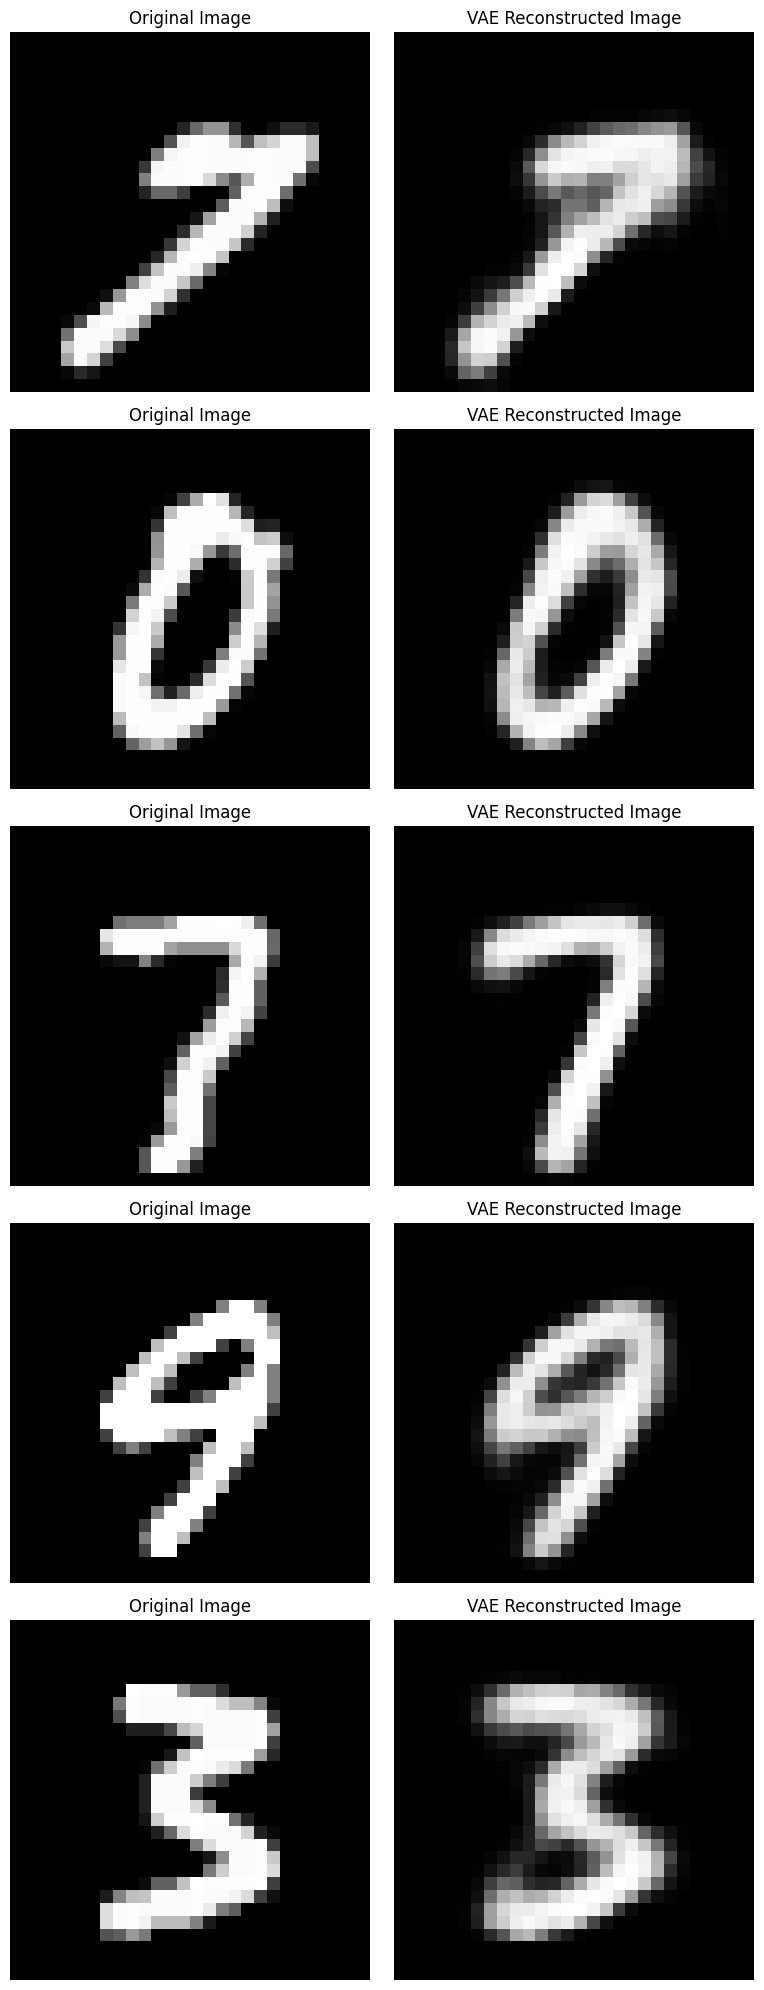

In [10]:
import matplotlib.pyplot as plt

# Function to visualize original and reconstructed images
def visualize_reconstruction(original_images, reconstructed_images):
    num_images = original_images.shape[0]
    fig, axes = plt.subplots(num_images, 2, figsize=(8, num_images * 4))
    for i in range(num_images):
        axes[i, 0].imshow(original_images[i].squeeze(), cmap='gray')
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(reconstructed_images[i].squeeze(), cmap='gray')
        axes[i, 1].set_title('VAE Reconstructed Image')
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

# Choose a few test images
num_test_images = 5
test_loader = DataLoader(test_dataset, batch_size=num_test_images, shuffle=True)
images, _ = next(iter(test_loader))

# Reconstruct the test images using the VAE model
vae_model.eval()
with torch.no_grad():
    reconstructed_images, _, _ = vae_model(images)

# Visualize original and reconstructed images
original_images_np = images.numpy()
reconstructed_images_np = reconstructed_images.numpy()
visualize_reconstruction(original_images_np, reconstructed_images_np)


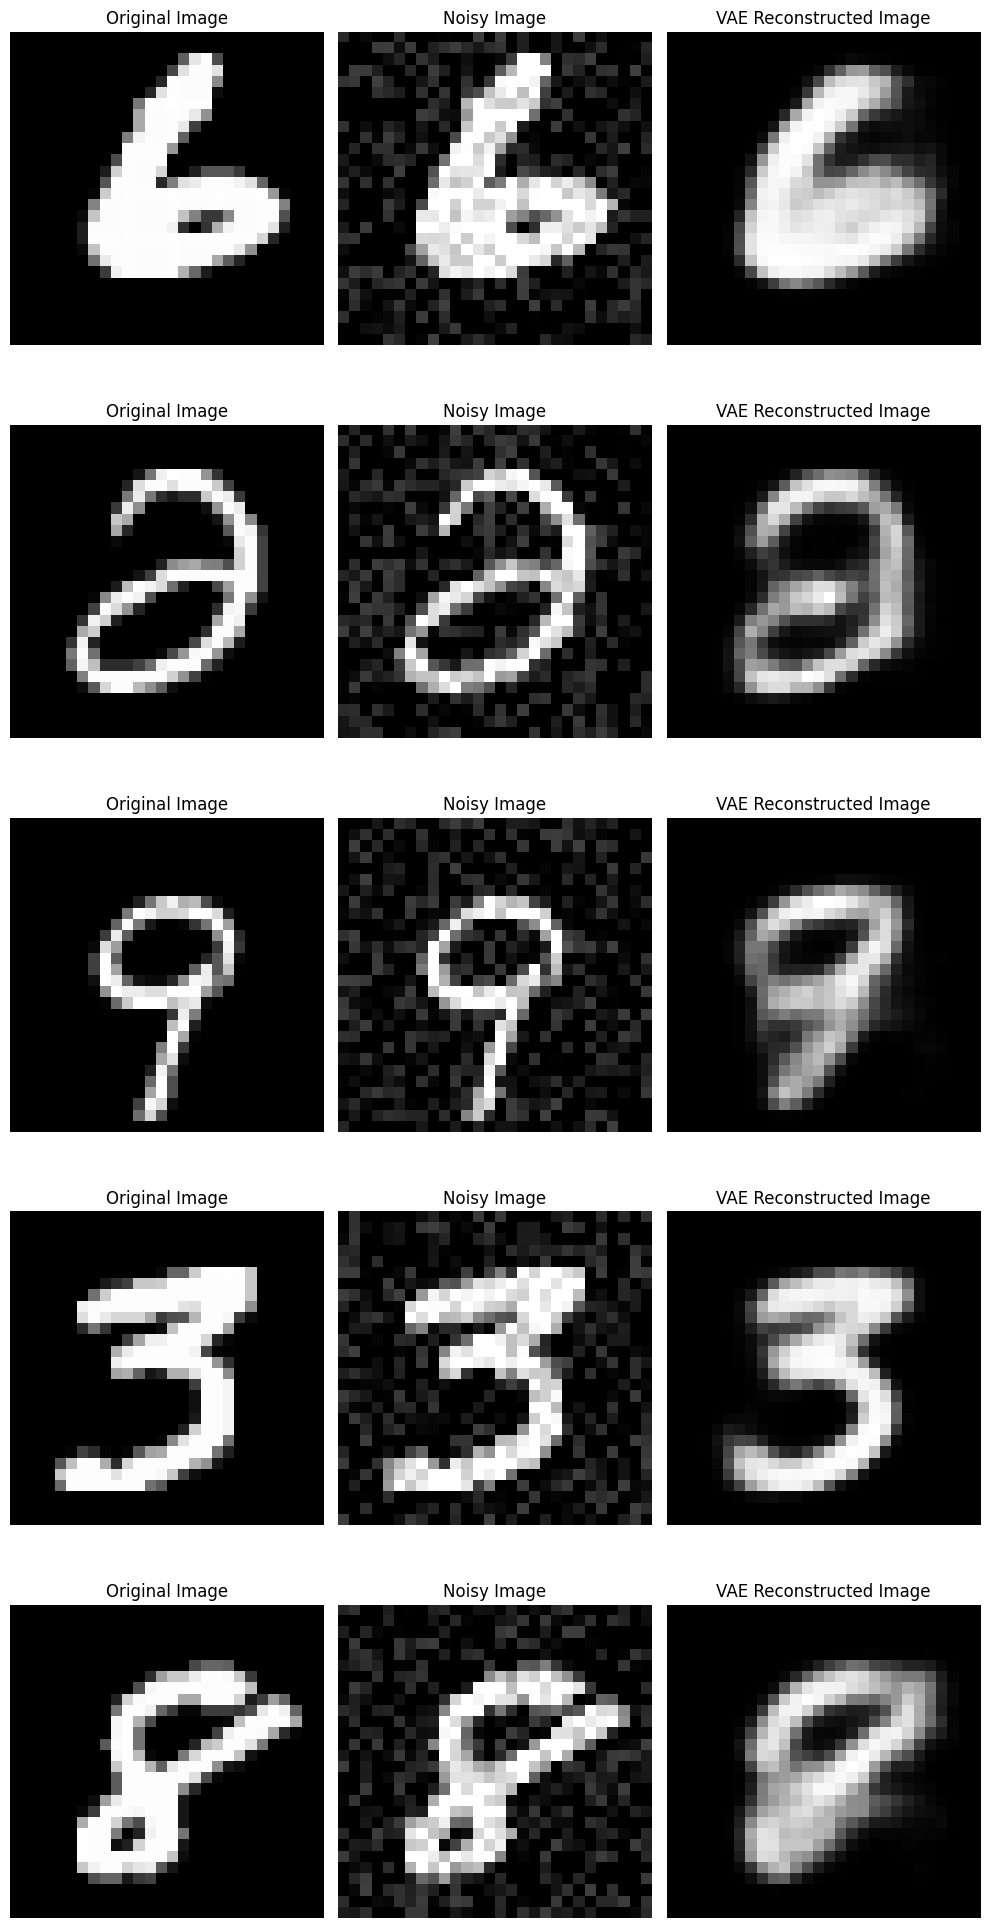

In [12]:

# Function to add noise to images
def add_noise(images):
    noise = torch.rand_like(images) - 0.5
    noisy_images = torch.clamp(images + 0.5 * noise, 0, 1)
    return noisy_images

# Choose a few test images
num_test_images = 5
test_loader = DataLoader(test_dataset, batch_size=num_test_images, shuffle=True)
images, _ = next(iter(test_loader))

# Add noise to the test images
noisy_images = add_noise(images)

# Reconstruct the noisy test images using the VAE model
vae_model.eval()
with torch.no_grad():
    reconstructed_images, _, _ = vae_model(noisy_images)

# Visualize original, noisy, and reconstructed images
original_images_np = images.numpy()
noisy_images_np = noisy_images.numpy()
reconstructed_images_np = reconstructed_images.numpy()

# Plot original, noisy, and reconstructed images
fig, axes = plt.subplots(num_test_images, 3, figsize=(10, num_test_images * 4))
for i in range(num_test_images):
    axes[i, 0].imshow(original_images_np[i].squeeze(), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(noisy_images_np[i].squeeze(), cmap='gray')
    axes[i, 1].set_title('Noisy Image')
    axes[i, 1].axis('off')
    axes[i, 2].imshow(reconstructed_images_np[i].squeeze(), cmap='gray')
    axes[i, 2].set_title('VAE Reconstructed Image')
    axes[i, 2].axis('off')
plt.tight_layout()
plt.show()


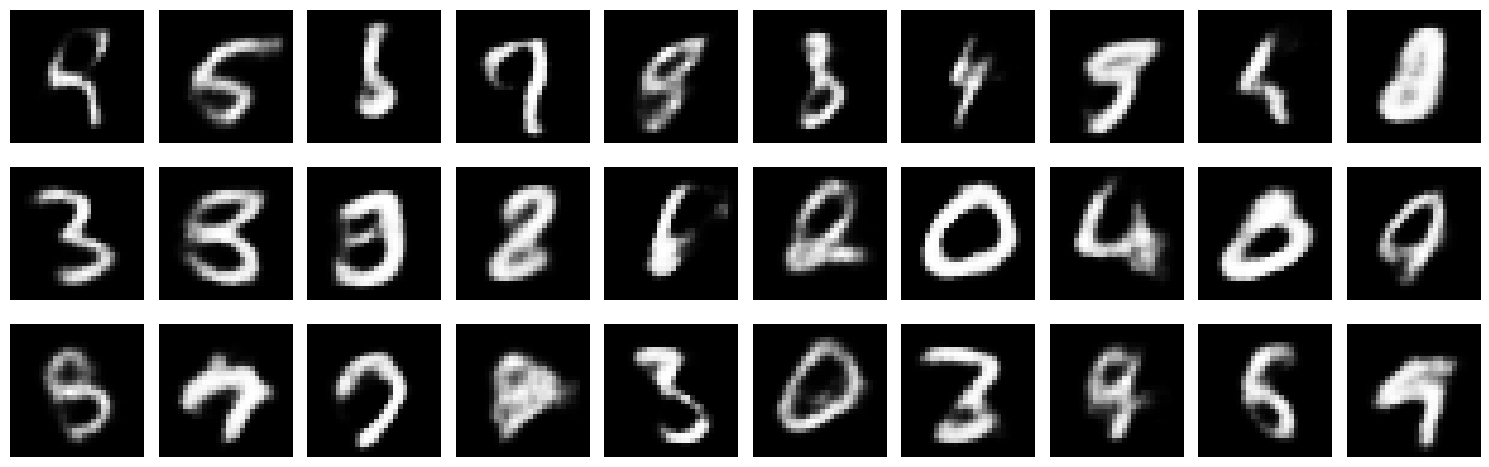

In [13]:
# Generate random samples from the latent space
latent_samples = torch.randn(30, latent_dimension)

# Decode the latent samples to obtain fake images
vae_model.eval()
with torch.no_grad():
    fake_images = vae_model.decoder(latent_samples)

# Plot the fake images
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
for i in range(30):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(fake_images[i].squeeze().numpy(), cmap='gray')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()


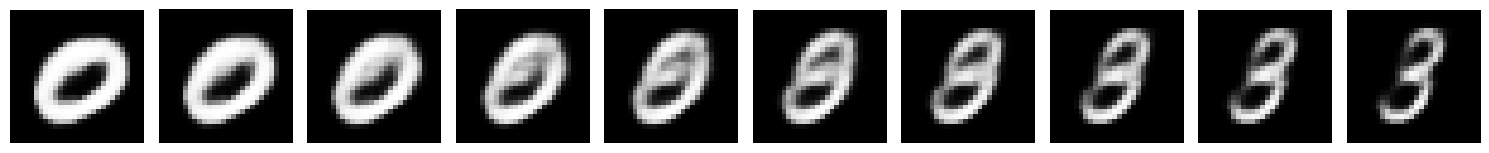

In [14]:
# Choose two test images from different classes
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True)
images, labels = next(iter(test_loader))

# Encode the test images to obtain their latent codes
vae_model.eval()
with torch.no_grad():
    mu1, logvar1 = vae_model.encoder(images[0].unsqueeze(0))
    mu2, logvar2 = vae_model.encoder(images[1].unsqueeze(0))

# Interpolate between the latent codes
alpha_values = torch.linspace(0, 1, steps=10)
interpolated_images = []
with torch.no_grad():
    for alpha in alpha_values:
        z = (1 - alpha) * mu1 + alpha * mu2
        fake_image = vae_model.decoder(z)
        interpolated_images.append(fake_image)

# Plot the interpolated images
fig, axes = plt.subplots(1, len(interpolated_images), figsize=(15, 3))
for i, fake_image in enumerate(interpolated_images):
    axes[i].imshow(fake_image.squeeze().numpy(), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
